In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('microdados_enem_2018.csv', sep=';', encoding='latin')

In [3]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180007186625,2018,2,F,0.0,4,1,2,0,4,1.0,0,1500800.0,Ananindeua,15.0,PA,4.0,1.0,1.0,1500800,Ananindeua,15,PA,1.0,1.0,1.0,1.0,449.0,454.0,457.0,462.0,534.2,611.4,517.9,496.3,BABDABEECDBDCBCAAAEDCEDDEADADEACABEEBABCABADC,CBAEACBBADABADEDDCDABBEAEEBBDDCECBECDABADDEEA,99999BDAECEBACECBBBBEBBDABDAAAADECCCDADBCCBBAA...,CCDAECBEBDAACDACABADECBDAADACBEDDAACBEABABDCD,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,40.0,40.0,120.0,40.0,360.0,E,E,D,D,2,F,A,C,D,A,A,A,B,A,A,B,A,B,C,B,B,D,B,C,B,B,D
1,180007186627,2018,3,F,0.0,4,1,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1503200,Igarapé-Açu,15,PA,1.0,1.0,1.0,1.0,447.0,454.0,457.0,459.0,506.9,477.8,495.3,440.6,BADEBBDBDECBADCCDCEDAEDBBEDCABEAECABCAEEAEACE,BEDBBDBCCABDADABAEDDBAABCDACBECCEACABAEAAAEAB,CDEBB99999ABADBBBEBDEBBADCDBCBDDCECDDAECAACDAA...,AEECACDEECDBBEEEABBEADDAADCEAEAEDCEBCDABDADEA,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,140.0,40.0,40.0,160.0,40.0,420.0,D,E,A,A,4,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A
2,180007186628,2018,3,M,0.0,0,1,2,0,2,1.0,0,3155603.0,Rio Pardo de Minas,31.0,MG,2.0,1.0,1.0,3155603,Rio Pardo de Minas,31,MG,1.0,1.0,1.0,1.0,449.0,453.0,458.0,462.0,470.6,473.8,534.4,410.4,CEEEEDBDACBBDADABCCCBDBBEBCEDEAACBACEEEBEBBEE,ECBDABEADCECAEAEECBCBDEABCDEADCBBCDAECDDBDABC,ECBDB99999CBDDCEABEABDBDEEECCCDDCCCDBDBBAAECBC...,BCAAACEBDCDBACADEABACCBDADADBDBCDCDABBDCBCDCB,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.0,120.0,120.0,100.0,120.0,140.0,600.0,B,B,A,A,7,B,A,B,D,B,B,B,A,A,A,A,A,A,B,B,A,D,A,A,A,B,A
3,180007186629,2018,2,F,0.0,3,1,2,0,4,1.0,0,1500800.0,Ananindeua,15.0,PA,4.0,1.0,1.0,1500800,Ananindeua,15,PA,1.0,1.0,1.0,1.0,450.0,452.0,456.0,461.0,588.9,663.3,614.5,711.5,AAEBECBAEAECEBAABADCDBDCDBAEDACBCDCDDCDEEBBEC,ACADBCEBDAACCDAEBEEDBDDDBEECDACAABDAABABEBECC,99999CBBEBDBCEDDCAAEDAEAEABEDCABBBCCDCDDDDCACE...,DABDACDCD*ACCDDBBDADEABBEEADAECABADBDDA*CDAEA,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,160.0,160.0,180.0,180.0,120.0,800.0,F,F,D,D,4,I,A,B,D,A,A,B,A,B,A,A,A,A,C,A,B,D,B,A,B,B,B
4,180007186631,2018,11,F,0.0,5,1,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2610905,Pesqueira,26,PE,1.0,1.0,1.0,1.0,448.0,452.0,456.0,460.0,477.8,621.5,519.4,543.1,ADEEEEEBDCBBBBCAACCCEEEDDACCCDBDAACCACBACECDC,AACCCEEADEEACEBBBEECCCBEBCECDDDAEAEDEEABEDECB,99999CDEDDDDBADDCBEBBBBBBDCDCBBDEEDADEDBDDDEBC...,ACCABCCBBDAEDDCBEEEEEDECECABBDCECCECDDABEADDA,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,120.0,120.0,120.0,100

In [4]:
df['nota_media'] = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)
df = df.query('nota_media > 0')

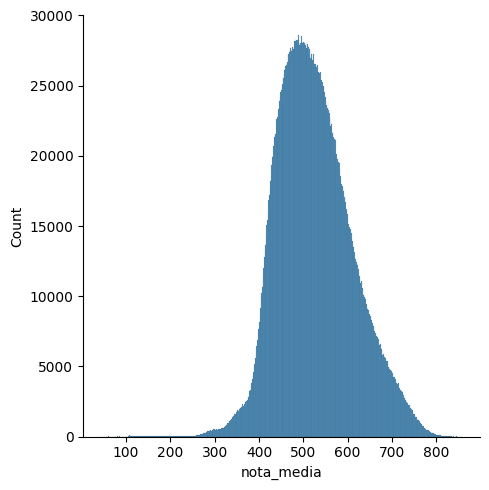

In [5]:
sns.displot(df, x='nota_media');

Analisando a correlação entre as notas de cada eixo avaliado:

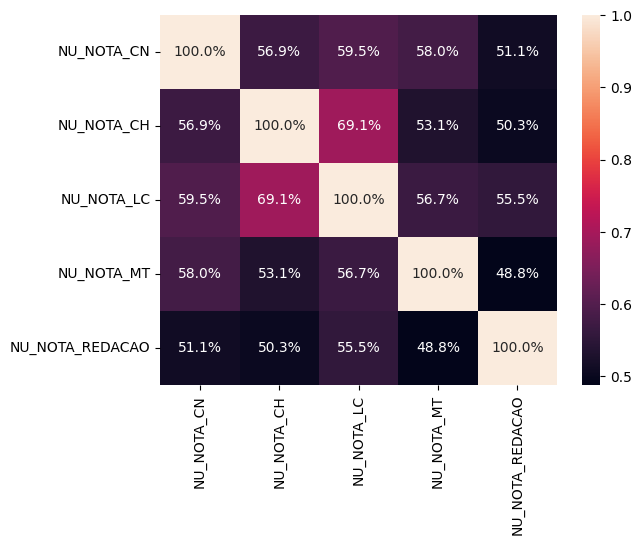

In [6]:
sns.heatmap(df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr(),
           annot=True, fmt='.1%');

E a matriz de covariância, que pode ser entendida como uma forma de correlação não-normalizada:

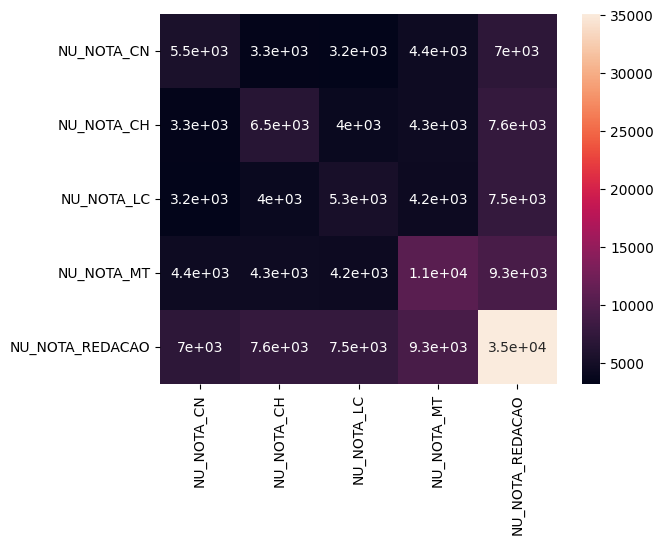

In [7]:
sns.heatmap(df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].cov(),
           annot=True);

A redação do ENEM é frequentemente criticada por ter uma variância de notas altas entre corretores. Podemos observar na matriz anterior que entre todos os eixos, a redação é o que tem menos correlação com as outras notas.

Vamos gerar um plot de _boxs and whiskers_, comumente chamado de _boxplot_. Essa visualização é particularmente útil para extrair informações sobre distribuições de uma forma visual. A barra central representa a mediana (quantil 50%), e as barras abaixo e acima desta representam os quantis 25% e 75%, respectivamente. Os pontos fora das duas barras da extremidade são _outliers_.

**Os gráficos _boxplot_ são um dos nossos melhores aliados para entender os datasets, pois carregam muita informação de uma forma visual e intuitiva. Existem variações como o _violin plot_ que têm o mesmo objetivo. Usaremos o _boxplot_ para a maioria das análises.**

- 1	Não Respondeu
- 2	Pública
- 3	Exterior
- 4	Privada

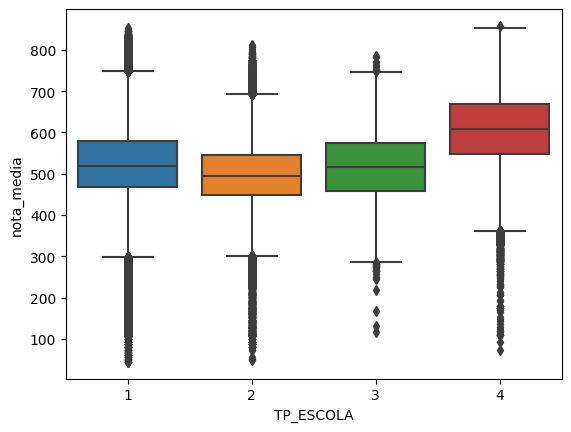

In [8]:
sns.boxplot(x=df['TP_ESCOLA'], y=df['nota_media']);

Podemos fazer a mesma análise por gênero:

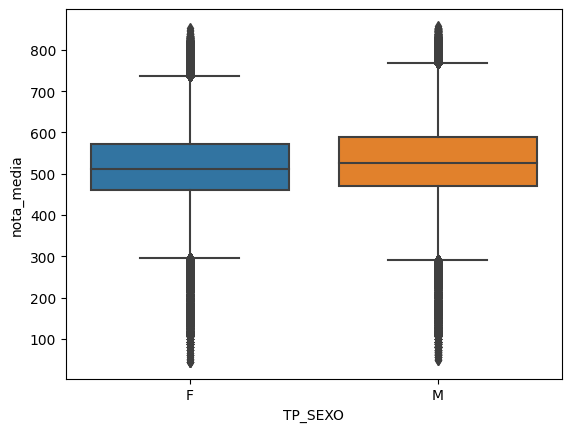

In [9]:
sns.boxplot(x=df['TP_SEXO'], y=df['nota_media']);

Às vezes, pode ser útil plots sobrepostos para termos uma ideia melhor da distribuição:

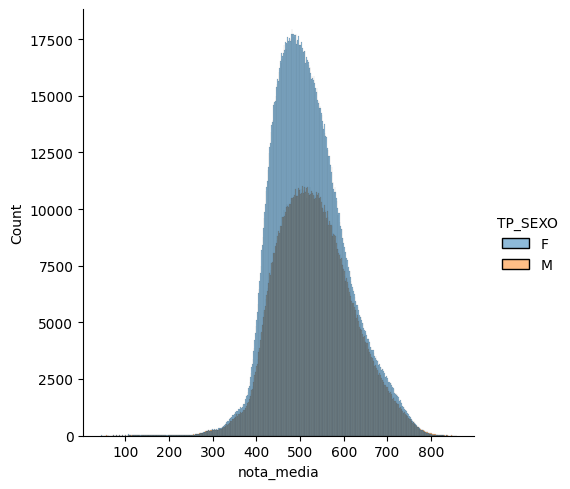

In [10]:
sns.displot(df, x='nota_media', hue='TP_SEXO');

Também podemos analisar por faixa etária. Aqui, valores maiores representam idades maiores:

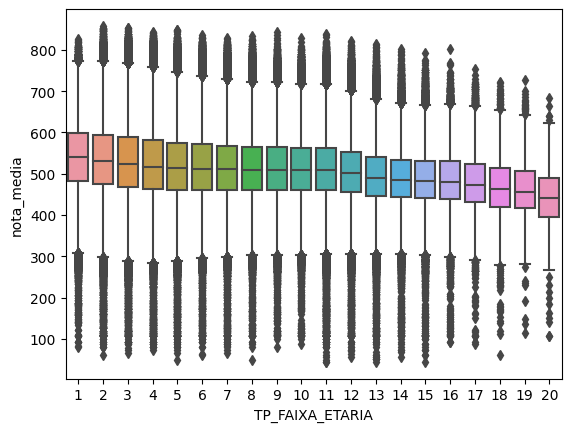

In [11]:
sns.boxplot(x=df['TP_FAIXA_ETARIA'], y=df['nota_media']);

Uma alternativa de visualização mais fácil é um simples histograma com as médias de cada grupo. Perdemos informação, mas ganhamos em simplicidade para comunicação de resultados e relações:

In [12]:
import numpy as np
df.groupby('TP_FAIXA_ETARIA').agg({'nota_media':np.mean}).style.bar()

,nota_media
TP_FAIXA_ETARIA,
1,541.740628
2,538.628155
3,532.133910
4,526.754823
5,523.433814
6,521.259574
7,518.354728
8,516.758366
9,515.422337


Vamos verificar agora as distribuições de nota em uma variável categórica, porém quebrada por gênero:

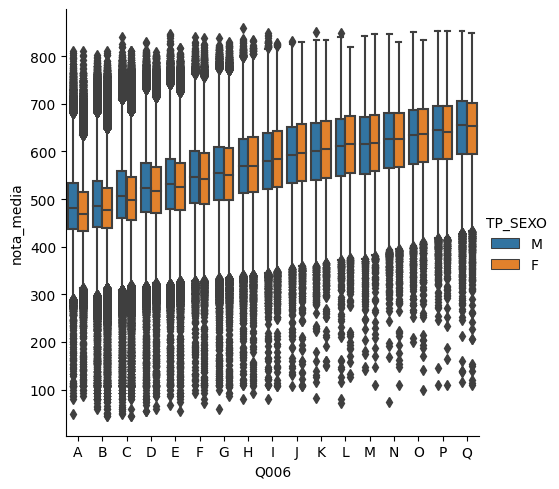

In [13]:
sns.catplot(df.sort_values(by='Q006'), x='Q006', y='nota_media', hue='TP_SEXO', kind='box');

Vamos fazer agora um recorte de etnia:

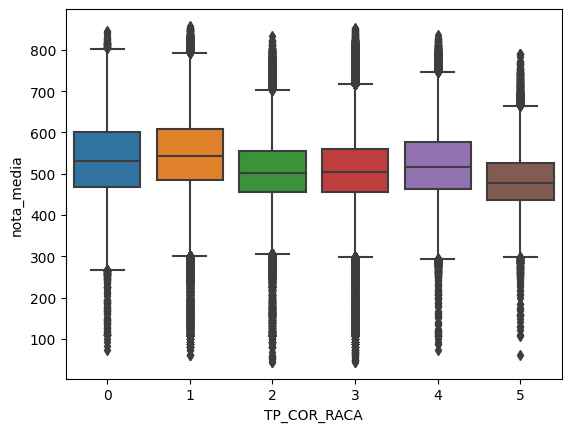

In [14]:
sns.boxplot(df, x='TP_COR_RACA', y='nota_media');

E por estado civil:

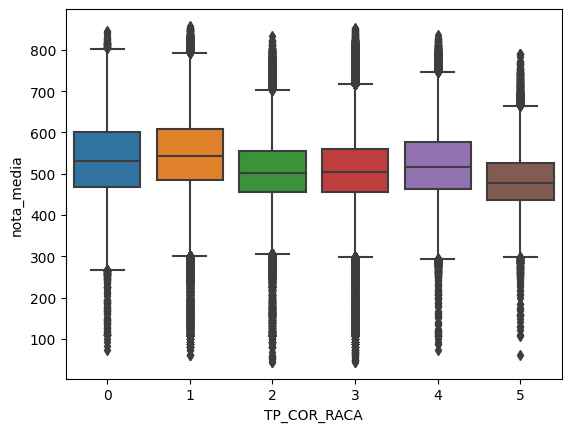

In [15]:
sns.boxplot(df, x='TP_COR_RACA', y='nota_media');

Por ano de conclusão do Ensino Médio:

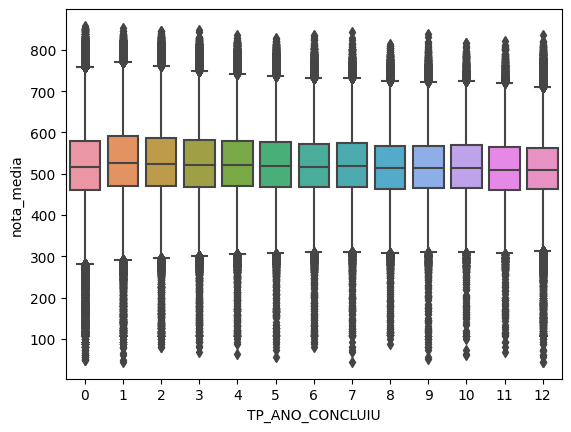

In [16]:
sns.boxplot(df, x='TP_ANO_CONCLUIU', y='nota_media');

Podemos também nos restringir somente à nota na redação:

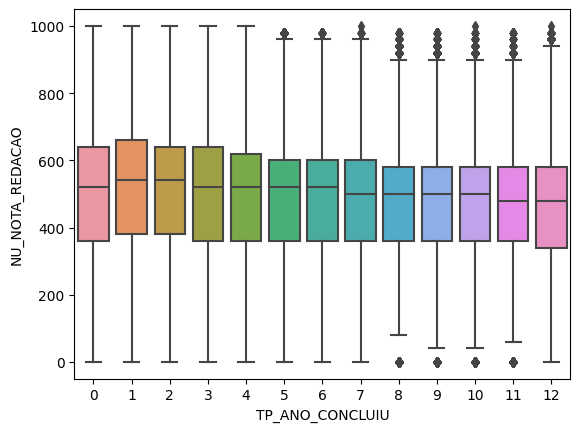

In [17]:
sns.boxplot(df, x='TP_ANO_CONCLUIU', y='NU_NOTA_REDACAO');

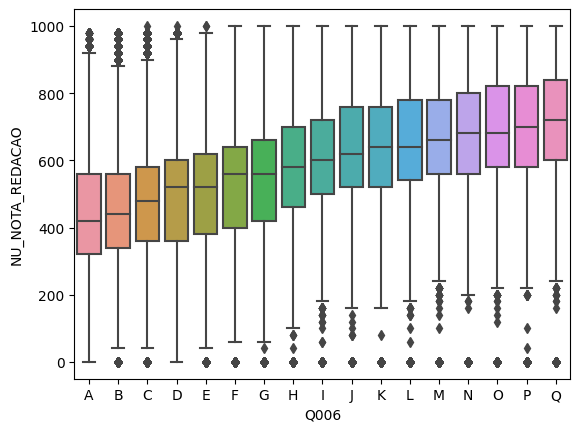

In [18]:
sns.boxplot(df.sort_values(by='Q006'), x='Q006', y='NU_NOTA_REDACAO');

Note que a distribuição da nota da redação é mais "espaçada" do que a da nota média - isto é, possui maior variância dentro de um grupo.

Mais algumas quebras por variáveis qualitativas:

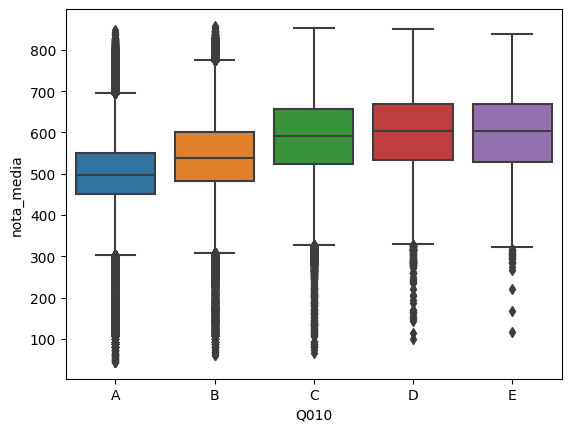

In [19]:
sns.boxplot(df.sort_values(by='Q010'), x='Q010', y='nota_media');

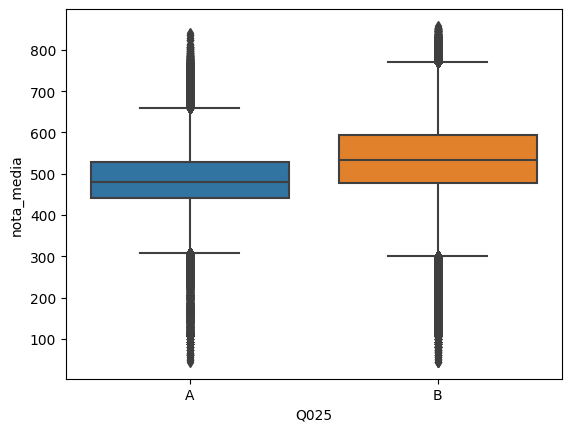

In [20]:
sns.boxplot(df.sort_values(by='Q025'), x='Q025', y='nota_media');

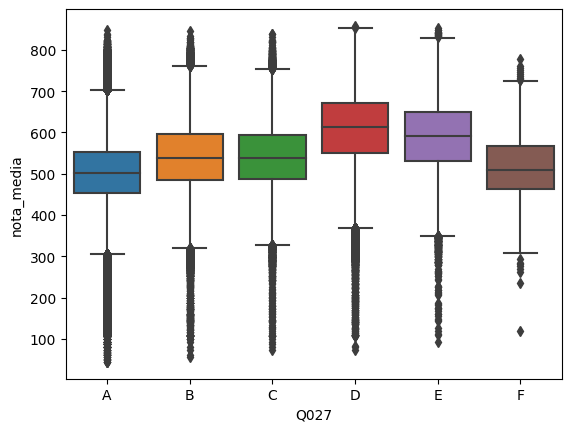

In [21]:
sns.boxplot(df.sort_values(by='Q027'), x='Q027', y='nota_media');

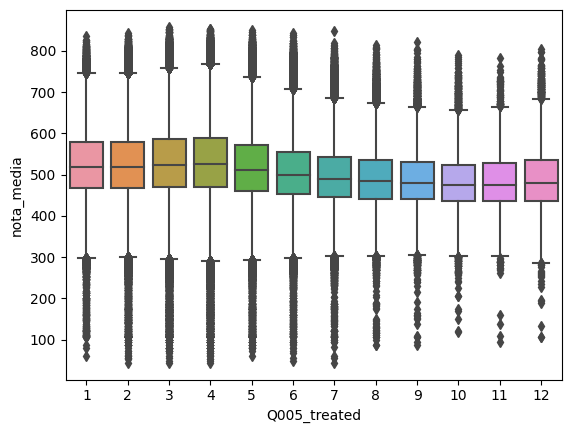

In [22]:
df['Q005_treated'] = df['Q005'].apply(lambda x: 12 if int(x)>=12 else x)
sns.boxplot(df.sort_values(by='Q005_treated'), x='Q005_treated', y='nota_media');